In [2]:
import qiskit as q
%matplotlib inline

#Quantum Circuit with 2 qubits and with 2 Classical Bits
circuit = q.QuantumCircuit(2,2) #[0 ,0] -> qubits (initial state)

#this is gonna make the first qubit !0 (not of 0). So [1 , 0]
circuit.x(0)

circuit.cx(0,1)

circuit.measure([0,1] , [0,1])
circuit.draw()


┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [3]:
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
from qiskit.tools.monitor import job_monitor

provider = IBMQ.get_provider('ibm-q')
backend = provider.get_backend("ibmq_burlington")
job = q.execute(circuit, backend=backend, shots = 3000)
job_monitor(job)

Job Status: job has been cancelled


In [8]:
provider = IBMQ.get_provider('ibm-q')
backend = provider.get_backend("ibmq_london")
job = q.execute(circuit, backend=backend, shots = 3000)
job_monitor(job)

Job Status: job has successfully run


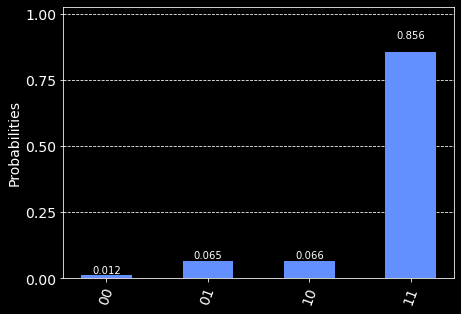

In [9]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [10]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter )

In [12]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

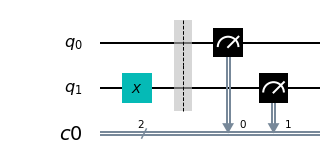

In [18]:
cal_circuits[2].draw(output='mpl')

In [19]:
cal_job = q.execute(
                    cal_circuits,
                    backend = backend,
                    optimization_level = 0
)

print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5f393fa30db6f0001abc031a
Job Status: job has successfully run


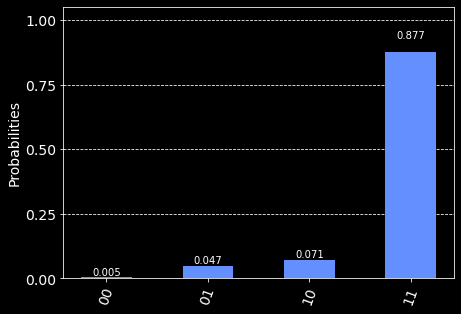

In [20]:
style.use("dark_background")

plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [21]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

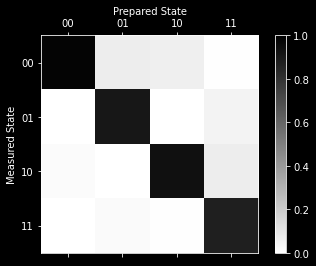

In [22]:
meas_fitter.plot_calibration()

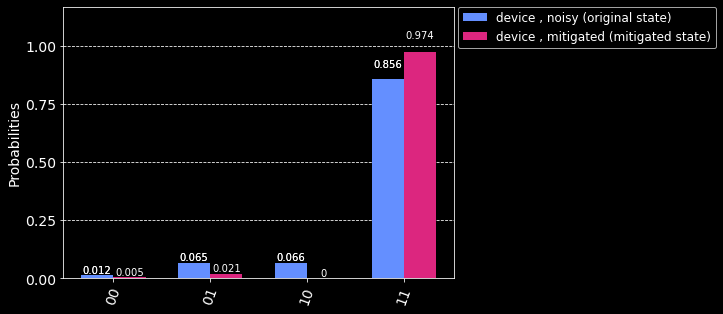

In [26]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(result)
device_counts = result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device , noisy (original state)' , 'device , mitigated (mitigated state)'])